In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [2]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
visa_df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

**Prevailing-wage**

In [6]:
p_wage=visa_df['prevailing_wage']
p_wage

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [7]:
p_wage.count()

25480

In [9]:
p_wage=visa_df[['prevailing_wage']]
p_wage.count().iloc[0]

25480

In [12]:
p_wage=visa_df['prevailing_wage']
p_wage.count()

25480

In [18]:
p_wage=visa_df['prevailing_wage']
wage_count=p_wage.count()
wage_mean=round(p_wage.mean(),2)
wage_median=round(p_wage.median(),2)
wage_max=round(p_wage.max(),2)
wage_min=round(p_wage.min(),2)
print(wage_count)
print(wage_mean)
print(wage_median)
print(wage_max)
print(wage_min)


25480
74455.81
70308.21
319210.27
2.14


In [17]:
list1=[wage_count,wage_mean,wage_median,wage_max,wage_min]
index_list=['count','mean','median','max','min']
pd.DataFrame(list1,
             columns=['prevailing_wage'],
             index=index_list)

,prevailing_wage
count,25480.00
mean,74455.81
median,70308.21
max,319210.27
min,2.14


In [38]:
# Numerical columns separately
num_cols=visa_df.select_dtypes(exclude='object').columns
dict1={}
for i in num_cols:
    count=visa_df[i].count()
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    maxx=round(visa_df[i].max(),2)
    minn=round(visa_df[i].min(),2)
    list1=[count,mean,median,maxx,minn]
    dict1[i]=list1
index_list=['count','mean','median','max','min']
numer_df=pd.DataFrame(dict1,index=index_list)
numer_df

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
max,602069.00,2016.00,319210.27
min,-26.00,1800.00,2.14


In [35]:
numer_df.to_csv("numer_df.csv")

In [36]:
pd.read_csv("numer_df.csv")

,Unnamed: 0,no_of_employees,yr_of_estab,prevailing_wage
0,count,25480.00,25480.00,25480.00
1,mean,5667.04,1979.41,74455.81
2,median,2109.00,1997.00,70308.21
3,max,602069.00,2016.00,319210.27
4,min,-26.00,1800.00,2.14


In [37]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
# Whatever we done above we can do using numpy

In [3]:
p_wage=visa_df['prevailing_wage']
np.mean(p_wage)

74455.81459209183

In [4]:
np.median(p_wage)

70308.20999999999

In [6]:
np.max(p_wage)

319210.27

In [7]:
np.min(p_wage)

2.1367

In [8]:
np.std(p_wage)

52814.90589711402

**percentile-quantile**

- In numpy package we have np.percentile() and np.quantile()

- percentile: if you want to 25p    25

- quantile:  q1=25p (0.25)  q2=50p  q3=75p
    
- Assume that a student got 120 marks 95p

     - 95% of students has marks below 120

In [9]:
np.percentile(p_wage,25)

34015.479999999996

In [11]:
np.quantile(p_wage,0.25)

34015.479999999996

In [13]:
p_wage=visa_df['prevailing_wage']
wage_count=p_wage.count()
wage_mean=round(p_wage.mean(),2)
wage_median=round(p_wage.median(),2)
wage_max=round(p_wage.max(),2)
wage_min=round(p_wage.min(),2)
wage_std=round(p_wage.std(),2)

wage_25p=round(np.percentile(p_wage,25),2)
wage_50p=round(np.percentile(p_wage,50),2)
wage_75p=round(np.percentile(p_wage,75),2)

list1=[wage_count,wage_mean,wage_median,wage_max,wage_min,wage_std,
       wage_25p,wage_50p,wage_75p]
index_list=['count','mean','median','max','min','std','25p','50p','75p']
pd.DataFrame(list1,
             columns=['prevailing_wage'],
             index=index_list)

,prevailing_wage
count,25480.00
mean,74455.81
median,70308.21
max,319210.27
min,2.14
std,52815.94
25p,34015.48
50p,70308.21
75p,107735.51


In [15]:
num_cols=visa_df.select_dtypes(exclude='object').columns
dict1={}
for i in num_cols:
    count=visa_df[i].count()
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    maxx=round(visa_df[i].max(),2)
    minn=round(visa_df[i].min(),2)
    std=round(visa_df[i].std(),2)
    p25=round(np.percentile(visa_df[i],25),2)
    p50=round(np.percentile(visa_df[i],50),2)
    p75=round(np.percentile(visa_df[i],75),2)
    list1=[count,mean,median,maxx,minn,std,p25,p50,p75]
    dict1[i]=list1
index_list=['count','mean','median','max','min','std','25%','50%','75%']
numer_df=pd.DataFrame(dict1,index=index_list)
numer_df

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
max,602069.00,2016.00,319210.27
min,-26.00,1800.00,2.14
std,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


In [18]:
#pwage 25p =34015

#25% of total employess has wages below 34015

25*(25480)/100

6370 employees has wages less than 34015

6370.0

In [19]:
p_wage=visa_df['prevailing_wage']
p_wage[p_wage<34015]

0          592.2029
7          418.2298
12       28663.0500
16        3706.7900
17       16132.6100
            ...    
25461       54.9196
25465      481.2238
25466     6973.4000
25470      516.4101
25473    22845.5600
Name: prevailing_wage, Length: 6370, dtype: float64

In [22]:
p_wage=visa_df['prevailing_wage']
count_25p=len(p_wage[p_wage<np.percentile(p_wage,25)])
count_50p=len(p_wage[p_wage<np.percentile(p_wage,50)])
count_75p=len(p_wage[p_wage<np.percentile(p_wage,75)])

l1=['Count of 25%','Count of 50%','Count of 75%']
l2=[count_25p,count_50p,count_75p]
d1=pd.DataFrame(zip(l1,l2),columns=['Till per','Count'])
d1

,Till per,Count
0,Count of 25%,6370
1,Count of 50%,12740
2,Count of 75%,19110


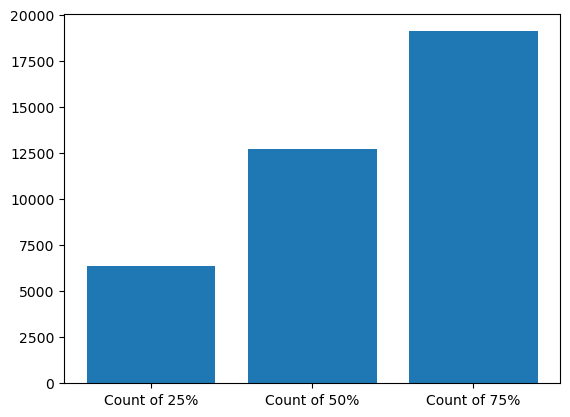

In [23]:
plt.bar('Till per','Count',data=d1)
plt.show()

In [ ]:
# You want to extract a dataframe
# Which has wages less than 34015(25p)

In [28]:
# step-1: take the reference column first
# step-2: apply the condition
#          it will provide True or false
# step-3: apply the original dataframe on top of that
#         so that it will give only True values

p_wage=visa_df['prevailing_wage']
p_25=np.percentile(p_wage,25)
con=p_wage<p_25
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
17,EZYV18,Asia,Master's,Y,N,2747,2001,West,16132.6100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified


In [27]:
visa_df[visa_df['prevailing_wage']<34015]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
16,EZYV17,Europe,Master's,Y,N,76638,1991,Midwest,3706.7900,Year,Y,Certified
17,EZYV18,Asia,Master's,Y,N,2747,2001,West,16132.6100,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25461,EZYV25462,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified


In [30]:
p_wage=visa_df['prevailing_wage']
p_50=np.percentile(p_wage,50)
con=p_wage<p_50
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified


In [29]:
# between 25p to 50p
# means 34k to 70k
# >25p and <50p
p_wage=visa_df['prevailing_wage']
p_25=np.percentile(p_wage,25)
p_50=np.percentile(p_wage,50)

con1=p_wage>p_25
con2=p_wage<p_50

visa_df[con1&con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.76,Year,Y,Certified
22,EZYV23,Asia,Master's,Y,N,2878,1968,West,45642.39,Year,Y,Certified
28,EZYV29,Asia,Master's,Y,N,18,2004,Northeast,40925.86,Year,Y,Certified
38,EZYV39,Asia,Bachelor's,Y,Y,2206,1909,Northeast,50960.01,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25449,EZYV25450,Asia,Bachelor's,Y,N,3017,2000,West,39313.00,Year,Y,Certified
25454,EZYV25455,Asia,Bachelor's,N,N,1316,2007,South,62844.97,Year,Y,Denied
25456,EZYV25457,Asia,Bachelor's,Y,N,998,1996,South,67340.65,Year,Y,Certified
25459,EZYV25460,Asia,High School,Y,N,4727,1990,Midwest,53952.84,Year,Y,Denied


In [33]:
p_wage=visa_df['prevailing_wage']
p_25=np.percentile(p_wage,25)
p_75=np.percentile(p_wage,75)

con1=p_wage<p_25
con2=p_wage>p_75

visa_df[con1|con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.4700,Year,N,Certified
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified


# Histogram

- From raw data will make class intervals

- will count the observations in each class intervals

- frequency distribution table

- plot of frequency distribution table is Histogram

(array([2992.,  871., 1005., 1170., 1242., 1434., 1385., 1443., 1444.,
        1445., 1457., 1335., 1268., 1217., 1088.,  978.,  807.,  645.,
         509.,  373.,  264.,  144.,  105.,  111.,  107.,   99.,   88.,
          79.,   65.,   64.,   58.,   53.,   33.,   33.,   29.,   19.,
           7.,    3.,    6.,    5.]),
 array([2.13670000e+00, 7.98234003e+03, 1.59625434e+04, 2.39427467e+04,
        3.19229500e+04, 3.99031534e+04, 4.78833567e+04, 5.58635600e+04,
        6.38437634e+04, 7.18239667e+04, 7.98041700e+04, 8.77843734e+04,
        9.57645767e+04, 1.03744780e+05, 1.11724983e+05, 1.19705187e+05,
        1.27685390e+05, 1.35665593e+05, 1.43645797e+05, 1.51626000e+05,
        1.59606203e+05, 1.67586407e+05, 1.75566610e+05, 1.83546813e+05,
        1.91527017e+05, 1.99507220e+05, 2.07487423e+05, 2.15467627e+05,
        2.23447830e+05, 2.31428033e+05, 2.39408237e+05, 2.47388440e+05,
        2.55368643e+05, 2.63348847e+05, 2.71329050e+05, 2.79309253e+05,
        2.87289457e+05, 2.9526

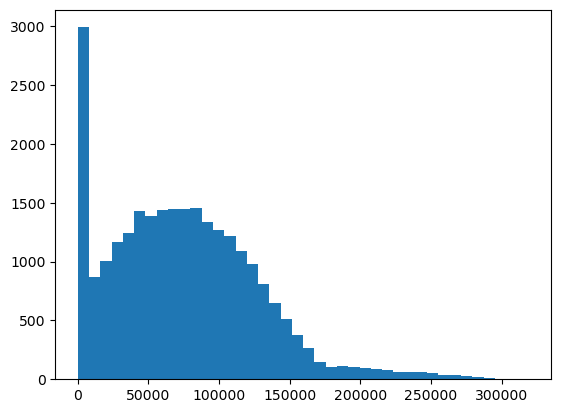

In [38]:
p_wage=visa_df['prevailing_wage']
freq,interval,n=plt.hist(p_wage,bins=40)
freq,interval

In [42]:
7.98234003e+03

7982.34003

In [44]:
p_wage=visa_df['prevailing_wage']
con1=p_wage>2.13
con2=p_wage<7982.34003
len(visa_df[con1&con2])

2992

In [41]:
p_wage=visa_df['prevailing_wage']
con1=p_wage>7.98234003e+03
con2=p_wage<1.59625434e+04
len(visa_df[con1&con2])

871

C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


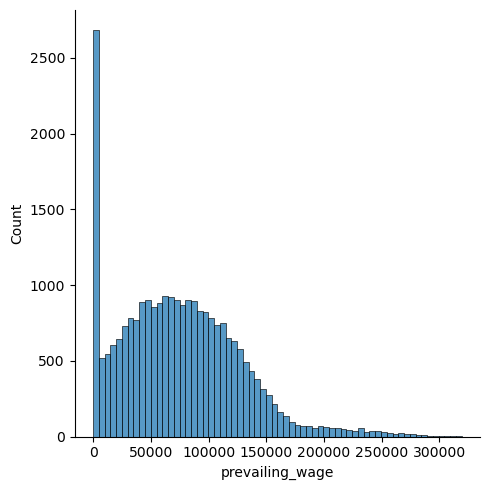

In [5]:
sns.displot(visa_df['prevailing_wage'])  # Histogram

C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


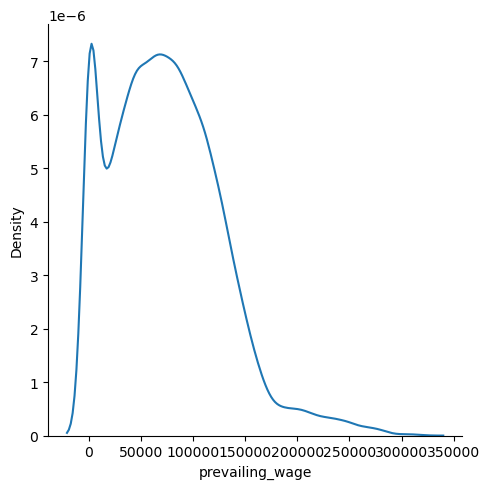

In [3]:
sns.displot(visa_df['prevailing_wage'],kind='kde') # kernal density estimation

C:\Users\ranja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


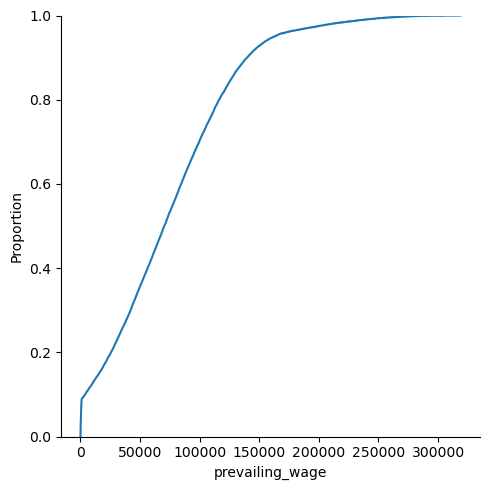

In [6]:
sns.displot(visa_df['prevailing_wage'],kind='ecdf') # coumulative distribution plot

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

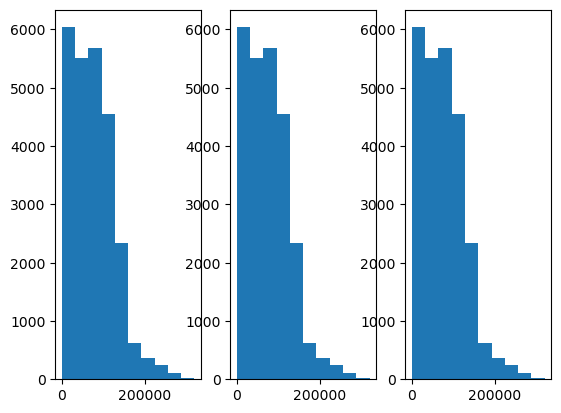

In [8]:
plt.subplot(1,3,1)     # 1 row 2 columns
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,3,2)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,3,3)
plt.hist(visa_df['prevailing_wage'])